In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

In [2]:
confirmed_df = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
line_list_df = pd.read_csv('novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
open_list_df = pd.read_csv('novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')
covid_data_df = pd.read_csv('novel-corona-virus-2019-dataset/covid_19_data.csv')


In [3]:
confirmed_df.head()

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        2        3        5   
1            NaN          Japan  36.0000  138.0000        2        1        2   
2            NaN      Singapore   1.2833  103.8333        0        1        3   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
0        7        8        8  ...      47      48      50      50      50   
1        2        4        4  ...     360     420     461     502     511   
2        3        4        5  ...     117     130     138     150     150   
3        1        1        1  ...       1       1       1       1       1   
4        3        4        4  ...      50      83      93      99     117   

   3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
0       53       59       70       75       82  
1      581      639      639      701      773  
2      160      178      178      200      212  
3        1        1        1        1        1  
4      129      149      149      197      238  

[5 rows x 57 columns]

In [4]:
cols = confirmed_df.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20'],
      dtype='object')


In [5]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recovered = recovered_df.loc[:, cols[4]:cols[-1]]

In [6]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [7]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

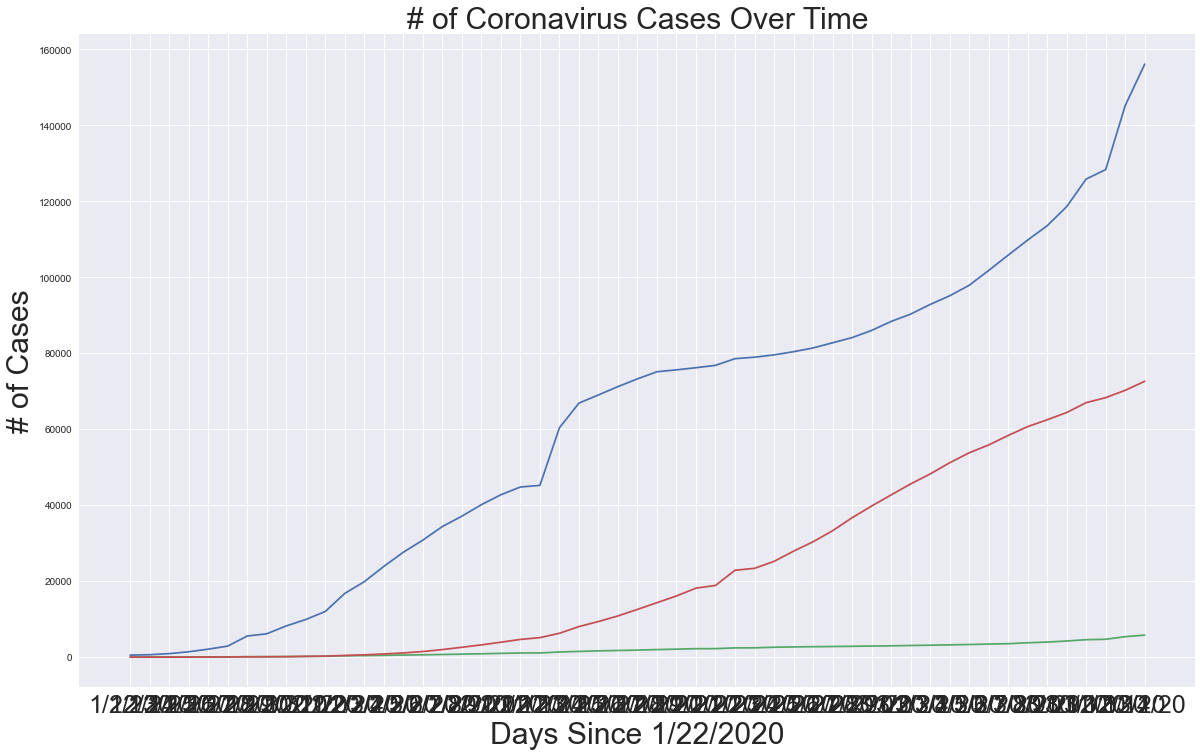

In [30]:
plt.figure(figsize=(20, 12))
plt.plot(dates, world_cases)
plt.plot(dates, total_deaths)
plt.plot(dates, total_recovered)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=25)
plt.show()

In [9]:
confirmed_df['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

In [10]:
confirmed_by_country = confirmed_df.groupby('Country/Region').sum()
deaths_by_country = deaths_df.groupby('Country/Region').sum()
recovered_by_country = recovered_df.groupby('Country/Region').sum()

In [11]:
confirmed_by_country

Lat      Long  1/22/20  1/23/20  1/24/20  \
Country/Region                                                                  
Afghanistan                      33.0000   65.0000        0        0        0   
Albania                          41.1533   20.1683        0        0        0   
Algeria                          28.0339    1.6596        0        0        0   
Andorra                          42.5063    1.5218        0        0        0   
Antigua and Barbuda              17.0608  -61.7964        0        0        0   
...                                  ...       ...      ...      ...      ...   
United Kingdom                  140.8912  -11.1540        0        0        0   
Uruguay                         -32.5228  -55.7658        0        0        0   
Venezuela                         6.4238  -66.5897        0        0        0   
Vietnam                          16.0000  108.0000        0        2        2   
occupied Palestinian territory   31.9522   35.2332        0        0        0   

                                1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Country/Region                                                                
Afghanistan                           0        0        0        0        0   
Albania                               0        0        0        0        0   
Algeria                               0        0        0        0        0   
Andorra                               0        0        0        0        0   
Antigua and Barbuda                   0        0        0        0        0   
...                                 ...      ...      ...      ...      ...   
United Kingdom                        0        0        0        0        0   
Uruguay                               0        0        0        0        0   
Venezuela                             0        0        0        0        0   
Vietnam                               2        2        2        2        2   
occupied Palestinian territory        0        0        0        0        0   

                                ...  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
Country/Region                  ...                                           
Afghanistan                     ...       1       1       1       4       4   
Albania                         ...       0       0       0       0       2   
Algeria                         ...      12      17      17      19      20   
Andorra                         ...       1       1       1       1       1   
Antigua and Barbuda             ...       0       0       0       0       0   
...                             ...     ...     ...     ...     ...     ...   
United Kingdom                  ...     116     164     207     274     322   
Uruguay                         ...       0       0       0       0       0   
Venezuela                       ...       0       0       0       0       0   
Vietnam                         ...      16      16      18      30      30   
occupied Palestinian territory  ...       0       0       0       0       0   

                                3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
Country/Region                                                               
Afghanistan                           5        7        7        7       11  
Albania                              10       12       23       33       38  
Algeria                              20       20       24       26       37  
Andorra                               1        1        1        1        1  
Antigua and Barbuda                   0        0        0        1        1  
...                                 ...      ...      ...      ...      ...  
United Kingdom                      384      459      459      801     1143  
Uruguay                               0        0        0        0        4  
Venezuela                             0        0        0        0        2  
Vietnam                              31       38       39       47   

<function matplotlib.pyplot.show(*args, **kw)>

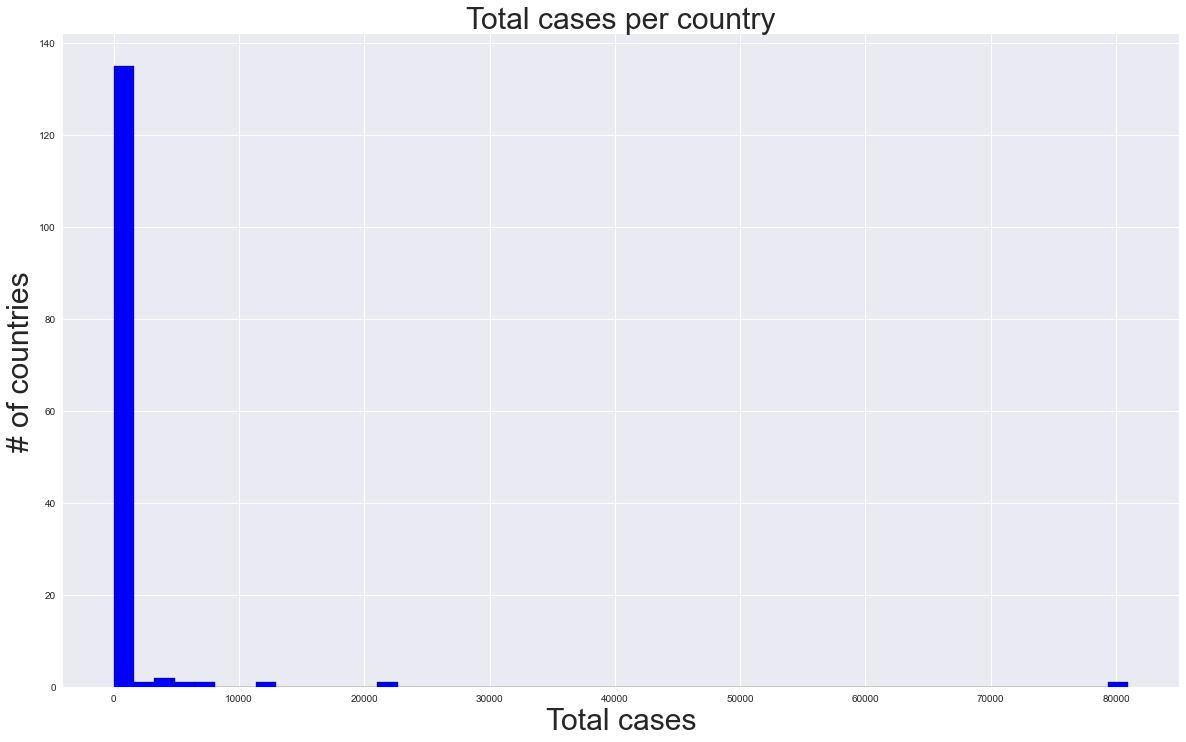

In [31]:
plt.figure(figsize=(20, 12))
plt.hist(confirmed_by_country['3/14/20'], color = 'blue', edgecolor = 'black',bins = 50)
plt.title('Total cases per country', size=30)
plt.xlabel('Total cases', size=30)
plt.ylabel('# of countries', size=30)
plt.show

In [13]:
confirmed_by_country_big_ones = confirmed_by_country[confirmed_by_country['3/14/20']>1000]
confirmed_by_country_big_ones

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
China           1083.3367   3684.4197      548      643      920     1406   
France            68.5187    -27.2629        0        0        2        3   
Germany           51.0000      9.0000        0        0        0        0   
Iran              32.0000     53.0000        0        0        0        0   
Italy             43.0000     12.0000        0        0        0        0   
Korea, South      36.0000    128.0000        1        1        2        2   
Norway            60.4720      8.4689        0        0        0        0   
Spain             40.0000     -4.0000        0        0        0        0   
Switzerland       46.8182      8.2275        0        0        0        0   
US              9517.5591 -23096.6146        1        1        2        2   
United Kingdom   140.8912    -11.1540        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  3/5/20  3/6/20  \
Country/Region                                      ...                   
China              2075     2877     5509     6087  ...   80537   80690   
France                3        3        4        5  ...     380     656   
Germany               0        1        4        4  ...     482     670   
Iran                  0        0        0        0  ...    3513    4747   
Italy                 0        0        0        0  ...    3858    4636   
Korea, South          3        4        4        4  ...    6088    6593   
Norway                0        0        0        0  ...      87     108   
Spain                 0        0        0        0  ...     259     400   
Switzerland           0        0        0        0  ...     114     214   
US                    5        5        5        5  ...     217     262   
United Kingdom        0        0        0        0  ...     116     164   

                3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
Country/Region                                                               
China            80770   80823   80860    80887    80921    80932    80945   
France             952    1129    1212     1787     2284     2284     3667   
Germany            799    1040    1176     1457     1908     2078     3675   
Iran              5823    6566    7161     8042     9000    10075    11364   
Italy             5883    7375    9172    10149    12462    12462    17660   
Korea, South      7041    7314    7478     7513     7755     7869     7979   
Norway             147     176     205      400      598      702      996   
Spain              500     673    1073     1695     2277     2277     5232   
Switzerland        268     337     374      491      652      652     1139   
US                 402     518     583      959     1281     1663     2179   
United Kingdom     207     274     322      384      459      459      801   

                3/14/20  
Country/Region           
China             80977  
France             4480  
Germany            4585  
Iran              12729  
Italy             21157  
Korea, South       8086  
Norway             1090  
Spain              6391  
Switzerland        1359  
US                 2727  
United Kingdom     1143  

[11 rows x 55 columns]

In [14]:
recovered_by_country_big_ones = recovered_by_country.loc[confirmed_by_country_big_ones.index , : ]
deaths_by_country_big_ones = deaths_by_country.loc[confirmed_by_country_big_ones.index , : ]
deaths_by_country_big_ones


Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
China           1083.3367   3684.4197       17       18       26       42   
France            68.5187    -27.2629        0        0        0        0   
Germany           51.0000      9.0000        0        0        0        0   
Iran              32.0000     53.0000        0        0        0        0   
Italy             43.0000     12.0000        0        0        0        0   
Korea, South      36.0000    128.0000        0        0        0        0   
Norway            60.4720      8.4689        0        0        0        0   
Spain             40.0000     -4.0000        0        0        0        0   
Switzerland       46.8182      8.2275        0        0        0        0   
US              9517.5591 -23096.6146        0        0        0        0   
United Kingdom   140.8912    -11.1540        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  3/5/20  3/6/20  \
Country/Region                                      ...                   
China                56       82      131      133  ...    3015    3044   
France                0        0        0        0  ...       6       9   
Germany               0        0        0        0  ...       0       0   
Iran                  0        0        0        0  ...     107     124   
Italy                 0        0        0        0  ...     148     197   
Korea, South          0        0        0        0  ...      35      42   
Norway                0        0        0        0  ...       0       0   
Spain                 0        0        0        0  ...       3       5   
Switzerland           0        0        0        0  ...       1       1   
US                    0        0        0        0  ...      12      14   
United Kingdom        0        0        0        0  ...       1       2   

                3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
Country/Region                                                               
China             3072    3100    3123     3139     3161     3172     3180   
France              11      19      19       33       48       48       79   
Germany              0       0       2        2        3        3        7   
Iran               145     194     237      291      354      429      514   
Italy              233     366     463      631      827      827     1266   
Korea, South        44      50      53       54       60       66       66   
Norway               0       0       0        0        0        0        0   
Spain               10      17      28       35       54       55      133   
Switzerland          1       2       2        3        4        4       11   
US                  17      21      22       28       36       40       47   
United Kingdom       2       3       4        6        8        8        8   

                3/14/20  
Country/Region           
China              3193  
France               91  
Germany               9  
Iran                611  
Italy              1441  
Korea, South         72  
Norway                3  
Spain               195  
Switzerland          13  
US                   54  
United Kingdom       21  

[11 rows x 55 columns]

In [15]:
confirmed_by_country_big_ones.index

Index(['China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, South', 'Norway',
       'Spain', 'Switzerland', 'US', 'United Kingdom'],
      dtype='object', name='Country/Region')

In [16]:
big_ones_cases = []
big_ones_total_deaths = [] 
big_ones_mortality_rate = []
big_ones_total_recovered = [] 

big_ones = []

for country in confirmed_by_country_big_ones.index:
    for i in dates:
        confirmed = confirmed_by_country_big_ones[confirmed_by_country_big_ones.index == country][i].sum()
        death = deaths_by_country_big_ones[deaths_by_country_big_ones.index == country][i].sum()
        recovered = recovered_by_country_big_ones[recovered_by_country_big_ones == country][i].sum()
        big_ones.append({'Country': country, 'Day': list(dates).index(i), 'Confirmed':
        confirmed, 'Recovered' : recovered, 'Death' : death})

/Users/lukasturtewagen/Library/Python/3.7/lib/python/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [17]:
big_ones_df = pd.DataFrame(big_ones)

In [18]:
big_ones_df

Country  Day  Confirmed  Recovered  Death
0             China    0        548        0.0     17
1             China    1        643        0.0     18
2             China    2        920        0.0     26
3             China    3       1406        0.0     42
4             China    4       2075        0.0     56
..              ...  ...        ...        ...    ...
578  United Kingdom   48        384        0.0      6
579  United Kingdom   49        459        0.0      8
580  United Kingdom   50        459        0.0      8
581  United Kingdom   51        801        0.0      8
582  United Kingdom   52       1143        0.0     21

[583 rows x 5 columns]

In [44]:
big_ones_df['t0'] = ""
for country in big_ones_df['Country'].unique():
    country_df = big_ones_df[big_ones_df['Country']==country]
    idx = (country_df['Confirmed'] > 10
    idx = idx[idx == True].first_valid_index()
    t0 = big_ones_df[big_ones_df.index==idx]['Day']
    big_ones_df[big_ones_df['Country']==country]['t0'] = t0
    print(t0)
    
    

0    0
Name: Day, dtype: int64
70    17
Name: Day, dtype: int64
118    12
Name: Day, dtype: int64
189    30
Name: Day, dtype: int64
242    30
Name: Day, dtype: int64
274    9
Name: Day, dtype: int64
356    38
Name: Day, dtype: int64
406    35
Name: Day, dtype: int64
462    38
Name: Day, dtype: int64
489    12
Name: Day, dtype: int64
563    33
Name: Day, dtype: int64


/Users/lukasturtewagen/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [37]:
big_ones_df

Country  Day  Confirmed  Recovered  Death t0
0             China    0        548        0.0     17   
1             China    1        643        0.0     18   
2             China    2        920        0.0     26   
3             China    3       1406        0.0     42   
4             China    4       2075        0.0     56   
..              ...  ...        ...        ...    ... ..
578  United Kingdom   48        384        0.0      6   
579  United Kingdom   49        459        0.0      8   
580  United Kingdom   50        459        0.0      8   
581  United Kingdom   51        801        0.0      8   
582  United Kingdom   52       1143        0.0     21   

[583 rows x 6 columns]